In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
# Import the complete redfin dataset
df = pd.read_csv("./redfin_2022_san_diego-all.csv")

In [195]:
# Display the first 5 results to get a snapshot of the data and categories.
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Condo/Co-op,3330 Caminito Eastbluff #149,La Jolla,CA,92037,1150000,3.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/3330-Camini...,SDMLS,220022531,N,Y,32.858687,-117.231625
1,MLS Listing,NaN,Single Family Residential,5640 Dugan Ave,La Mesa,CA,91942,759000,3.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Mesa/5640-Dugan-A...,SDMLS,220021439,N,Y,32.780982,-117.020159
2,MLS Listing,NaN,Townhouse,3422 Via Alicante,La Jolla,CA,92037,829900,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/3422-Via-Al...,SDMLS,220020482,N,Y,32.861255,-117.231921
3,MLS Listing,NaN,Condo/Co-op,8437 Via Mallorca #85,La Jolla,CA,92037,875000,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/CA/La-Jolla/8437-Via-Ma...,SDMLS,220020168,N,Y,32.859532,-117.233455
4,MLS Listing,NaN,Single Family Residential,11393 Turtleback Ln,San Diego,CA,92127,1195000,4.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/CA/San-Diego/11393-Turt...,SDMLS,220019616,N,Y,33.009474,-117.083660


In [196]:
# Brief Data Snapshot before cleaning data
print("Sum of missing values: ", df.isnull().sum().sum())
print("Columns with NA: ", df.columns[df.isna().any()].tolist())
print("Show Missing Values:", df.isnull())
print("Missing Values Present:", df.isnull().values.any())

Sum of missing values:  1118
Columns with NA:  ['SOLD DATE', 'ADDRESS', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME']
Show Missing Values:      SALE TYPE  SOLD DATE  PROPERTY TYPE  ADDRESS   CITY  STATE OR PROVINCE  \
0        False       True          False    False  False              False   
1        False       True          False    False  False              False   
2        False       True          False    False  False              False   
3        False       True          False    False  False              False   
4        False       True          False    False  False              False   
..         ...        ...            ...      ...    ...                ...   
295      False       True          False    False  False              False   
296      False       True          False    False  False              False   
297      False       True       

In [197]:
# Drop the data columns that are not relevant and display the snapshot of the new dataframe
df_mod = df.drop(['SOLD DATE', 'ADDRESS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'], axis=1)

# Drop "Sale Type" of "New Construction Plan" due to significant missing data
new_const = df_mod[df_mod["SALE TYPE"] == "New Construction Plan"].index
df_mod.drop(new_const, inplace = True)

# Drop Town Homes which have a Lot Size of "0"
town_homes = df_mod[df_mod["PROPERTY TYPE"] == "Townhouse"].index
df_mod.drop(town_homes, inplace = True)

# Drop Rows where "Property Type" is "Vacant Land"
vacant_land = df_mod[df_mod['PROPERTY TYPE'] == 'Vacant Land'].index
df_mod.drop(vacant_land, inplace = True)

# Fill NA values of "HOA" with "0"
df_mod["HOA/MONTH"].fillna(0, inplace=True)

# Fill NA "Lot Size" with Mean Value
df_mod["LOT SIZE"].fillna(df_mod['LOT SIZE'].mean(), inplace=True)
 
df_mod

,SALE TYPE,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS
0,MLS Listing,Condo/Co-op,La Jolla,CA,92037,1150000,3.0,2.5,La Jolla,1707.0,155945.000000,1978.0,13.0,674.0,495.0,Active
1,MLS Listing,Single Family Residential,La Mesa,CA,91942,759000,3.0,2.0,La Mesa,1018.0,6100.000000,1958.0,27.0,746.0,0.0,Active
3,MLS Listing,Condo/Co-op,La Jolla,CA,92037,875000,2.0,2.5,La Jolla,1074.0,103585.000000,1977.0,42.0,815.0,400.0,Active
4,MLS Listing,Single Family Residential,San Diego,CA,92127,1195000,4.0,3.0,Rancho Bernardo,2284.0,10259.000000,1981.0,48.0,523.0,107.0,Active
5,MLS Listing,Condo/Co-op,La Jolla,CA,92037,579000,1.0,1.0,La Jolla,504.0,98435.000000,1972.0,82.0,1149.0,300.0,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,MLS Listing,Condo/Co-op,La Jolla,CA,92037,2500000,2.0,2.0,La Jolla,1676.0,49491.703297,2004.0,692.0,1492.0,624.0,Active
292,MLS Listing,Single Family Residential,La Jolla,CA,92037,3695000,3.0,2.0,La Jolla,1280.0,4107.000000,1944.0,982.0,2887.0,0.0,Active
293,For-Sale-by-Owner Listing,Condo/Co-op,San Diego,CA,92122,776000,2.0,2.0,La Jolla,934.0,49491.703297,1987.0,38.0,831.0,0.0,Active
294,New Construction Home,Single Family Residential,San Diego,CA,92127,1345900,4.0,3.5,Avion,2289.0,49491.703297,2022.0,21.0,588.0,0.0,Active


In [198]:
# Brief Data Snapshot after cleaning data
print("Sum of missing values: ", df_mod.isnull().sum().sum())
print("Columns with NA: ", df_mod.columns[df_mod.isna().any()].tolist())
print("Show Missing Values:", df_mod.isnull())
print("Missing Values Present:", df_mod.isnull().values.any())

Sum of missing values:  0
Columns with NA:  []
Show Missing Values:      SALE TYPE  PROPERTY TYPE   CITY  STATE OR PROVINCE  ZIP OR POSTAL CODE  \
0        False          False  False              False               False   
1        False          False  False              False               False   
3        False          False  False              False               False   
4        False          False  False              False               False   
5        False          False  False              False               False   
..         ...            ...    ...                ...                 ...   
291      False          False  False              False               False   
292      False          False  False              False               False   
293      False          False  False              False               False   
294      False          False  False              False               False   
295      False          False  False              False        

In [199]:
# Display the info and datatypes for the new dataframe
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 295
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SALE TYPE           262 non-null    object 
 1   PROPERTY TYPE       262 non-null    object 
 2   CITY                262 non-null    object 
 3   STATE OR PROVINCE   262 non-null    object 
 4   ZIP OR POSTAL CODE  262 non-null    int64  
 5   PRICE               262 non-null    int64  
 6   BEDS                262 non-null    float64
 7   BATHS               262 non-null    float64
 8   LOCATION            262 non-null    object 
 9   SQUARE FEET         262 non-null    float64
 10  LOT SIZE            262 non-null    float64
 11  YEAR BUILT          262 non-null    float64
 12  DAYS ON MARKET      262 non-null    float64
 13  $/SQUARE FEET       262 non-null    float64
 14  HOA/MONTH           262 non-null    float64
 15  STATUS              262 non-null    object 
dtypes: float

In [200]:
# Basic Data Analysis for the Dataframe
df_mod.describe()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
count,262.000000,2.620000e+02,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,92050.435115,3.363844e+06,3.637405,3.280534,2940.076336,49491.703297,1984.244275,57.141221,1022.538168,243.896947
std,62.942180,4.836765e+06,1.588456,1.913484,2491.562322,83974.145035,23.807688,90.376475,657.986220,383.798519
min,91942.000000,3.690000e+05,0.000000,1.000000,432.000000,504.000000,1920.000000,1.000000,382.000000,0.000000
25%,92037.000000,8.990000e+05,3.000000,2.000000,1321.000000,9256.000000,1966.000000,17.000000,626.000000,0.000000
50%,92037.000000,1.998000e+06,4.000000,2.500000,2143.000000,34194.500000,1984.500000,35.500000,829.500000,90.000000
75%,92127.000000,3.736250e+06,5.000000,4.500000,3808.500000,49491.703297,2005.000000,68.000000,1195.250000,400.000000
max,92127.000000,4.500000e+07,10.000000,12.500000,22897.000000,872630.000000,2022.000000,982.000000,6585.000000,3353.000000


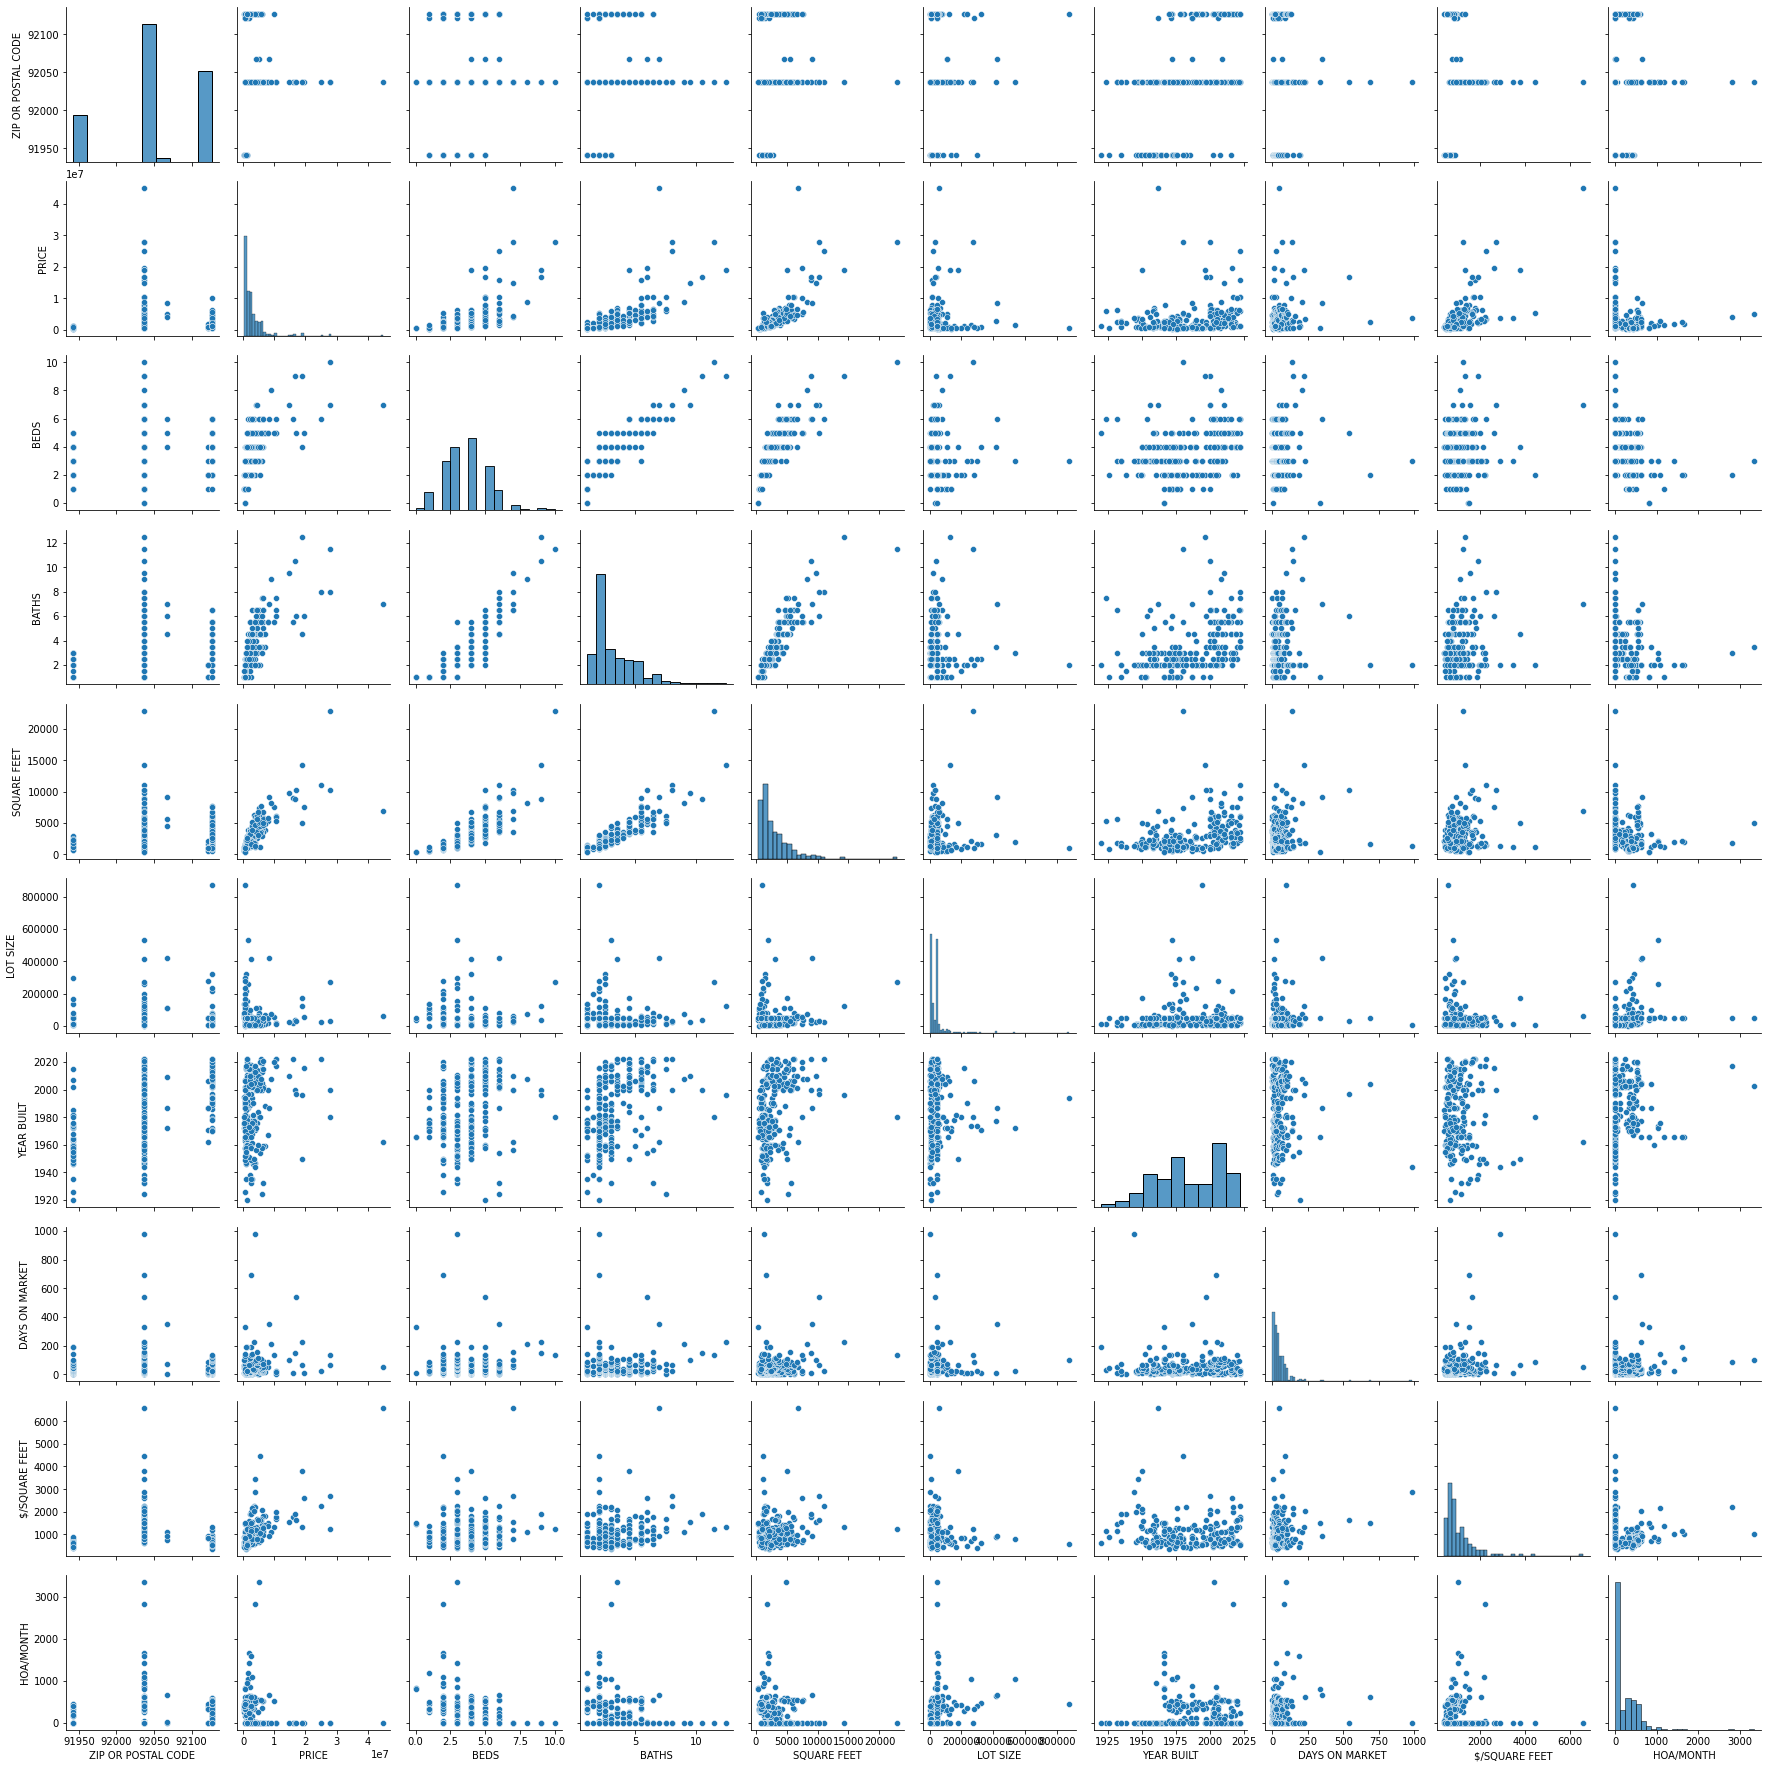

In [201]:
sns.pairplot(df_mod)

In [202]:
# Group the dataframe by the "Zip or Postal Code" and display the mean of each group
df_group_mean = df_mod.groupby(["ZIP OR POSTAL CODE"]).mean() # Verify this method

# Sort the groups by the "$/Square Feet" to rank least/most expensive neighborhoods
df_sort_mean = df_group_mean.sort_values(by=['$/SQUARE FEET'], ascending=False)
df_sort_mean

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
92037,4.958233e+06,3.653846,3.519231,3307.038462,48970.211834,1980.061538,69.923077,1390.723077,275.169231
92067,5.865633e+06,5.000000,5.833333,6387.333333,213008.000000,1989.333333,142.333333,928.666667,225.666667
92122,9.424750e+05,2.250000,1.750000,1103.625000,67209.814560,1984.250000,32.375000,861.625000,228.750000
92127,2.281949e+06,4.077922,3.616883,3224.987013,51066.287998,2003.000000,43.506494,674.974026,281.129870
91942,8.161404e+05,2.977273,2.090909,1456.136364,33906.637113,1963.431818,41.931818,578.613636,90.340909


In [203]:
# Group the dataframe by the "Zip or Postal Code" and display the std of each group
df_group_std = df_mod.groupby(["ZIP OR POSTAL CODE"]).std() # Verify this method
df_group_std


,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH
ZIP OR POSTAL CODE,,,,,,,,,
91942,2.145983e+05,0.927328,0.622007,462.948869,53033.930640,18.405507,44.284176,116.278978,160.222511
92037,6.293927e+06,1.862363,2.303018,3031.672735,69945.852517,23.344987,118.616025,761.316801,504.177127
92067,2.229955e+06,1.000000,1.258306,2396.137378,179943.755871,18.610033,183.522024,174.046929,371.948025
92122,4.319988e+05,0.886405,0.462910,523.688822,86385.050368,12.991756,28.339460,45.453076,193.306382
92127,1.664889e+06,1.211418,1.325102,1734.767621,107469.968711,12.923866,33.854030,151.506121,189.813160
